# Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import shap

import matplotlib.pyplot as plt
import pickle

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Configurações

In [2]:
model_path = Path(r'..\..\06_modelos')
data_path = Path(r'..\..\01_dados\04_dados_modelos')
save_plot_path = Path(r'..\..\05_plots\shap\final')
save_plot_path.mkdir(parents=True, exist_ok=True)

## Importação dos Modelos

In [3]:
with open(model_path / 'melhor_modelo_ne.pkl', 'rb') as file:
    model_ne =  pickle.load(file)

with open(model_path / 'melhor_modelo_n.pkl', 'rb') as file:
    model_n =  pickle.load(file)
    
with open(model_path / 'melhor_modelo_s.pkl', 'rb') as file:
    model_s =  pickle.load(file)

with open(model_path / 'melhor_modelo_se.pkl', 'rb') as file:
    model_se =  pickle.load(file)

## Importação dos Dados

In [4]:
df_ne = pd.read_csv(data_path / 'dados_ne_lag_20.csv')
df_n = pd.read_csv(data_path / 'dados_n_lag_35.csv')
df_s = pd.read_csv(data_path / 'dados_s_lag_35.csv')
df_se = pd.read_csv(data_path / 'dados_se_lag_35.csv')

# Preparando os dados para extrair as características
X_ne = df_ne.drop(columns=['din_instante', 'cmo'])
X_n = df_n.drop(columns=['din_instante', 'cmo'])
X_s = df_s.drop(columns=['din_instante', 'cmo'])
X_se = df_se.drop(columns=['din_instante', 'cmo'])

# Análises

In [5]:
# Criando gráficos para cada modelo
models = {
    'NE': (model_ne, df_ne),
    'N': (model_n, df_n),
    'S': (model_s, df_s),
    'SE': (model_se, df_se)
}

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


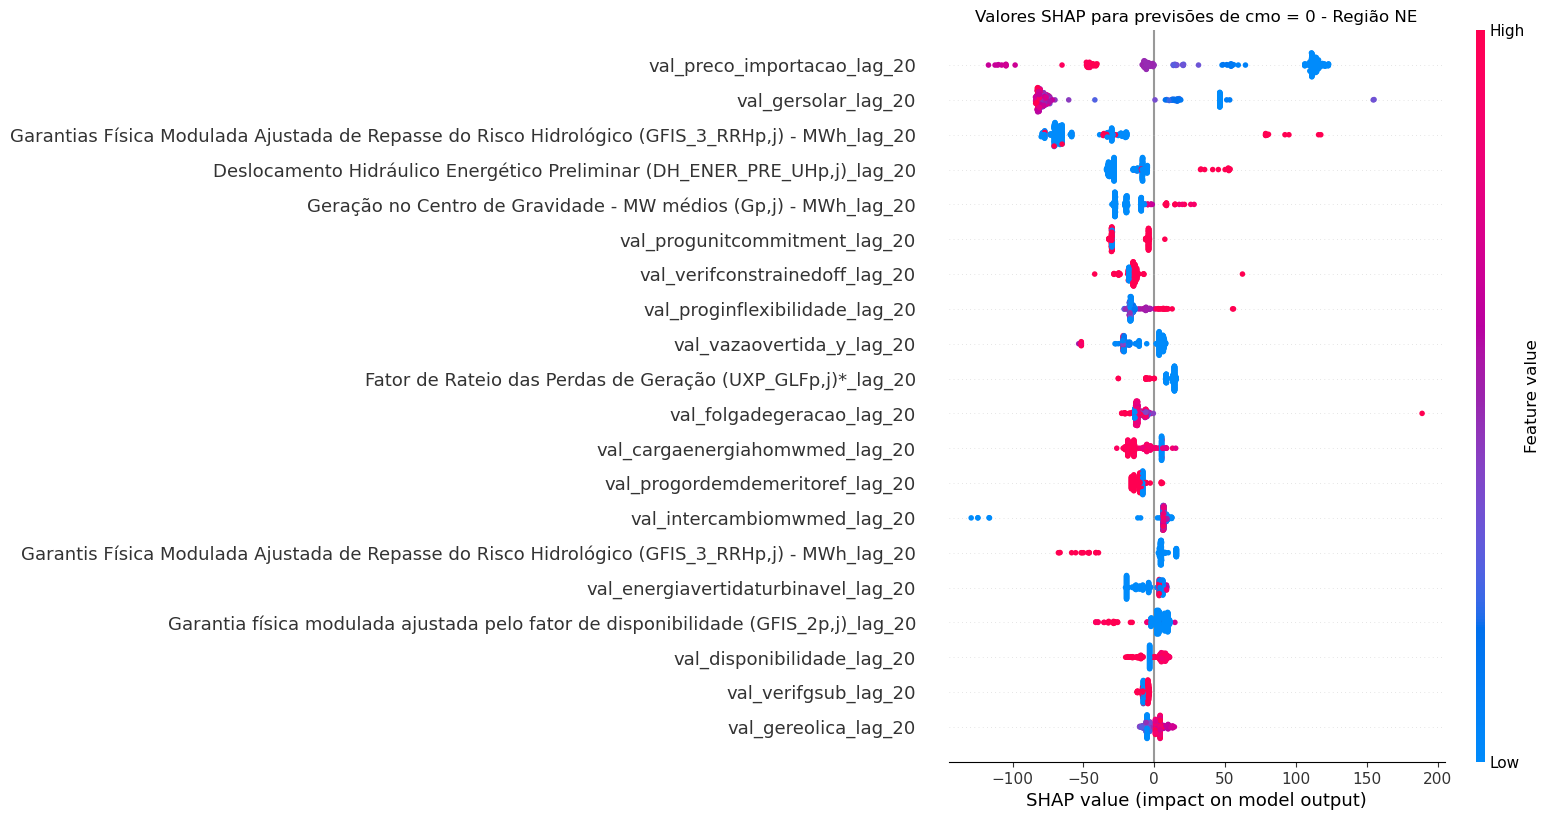

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


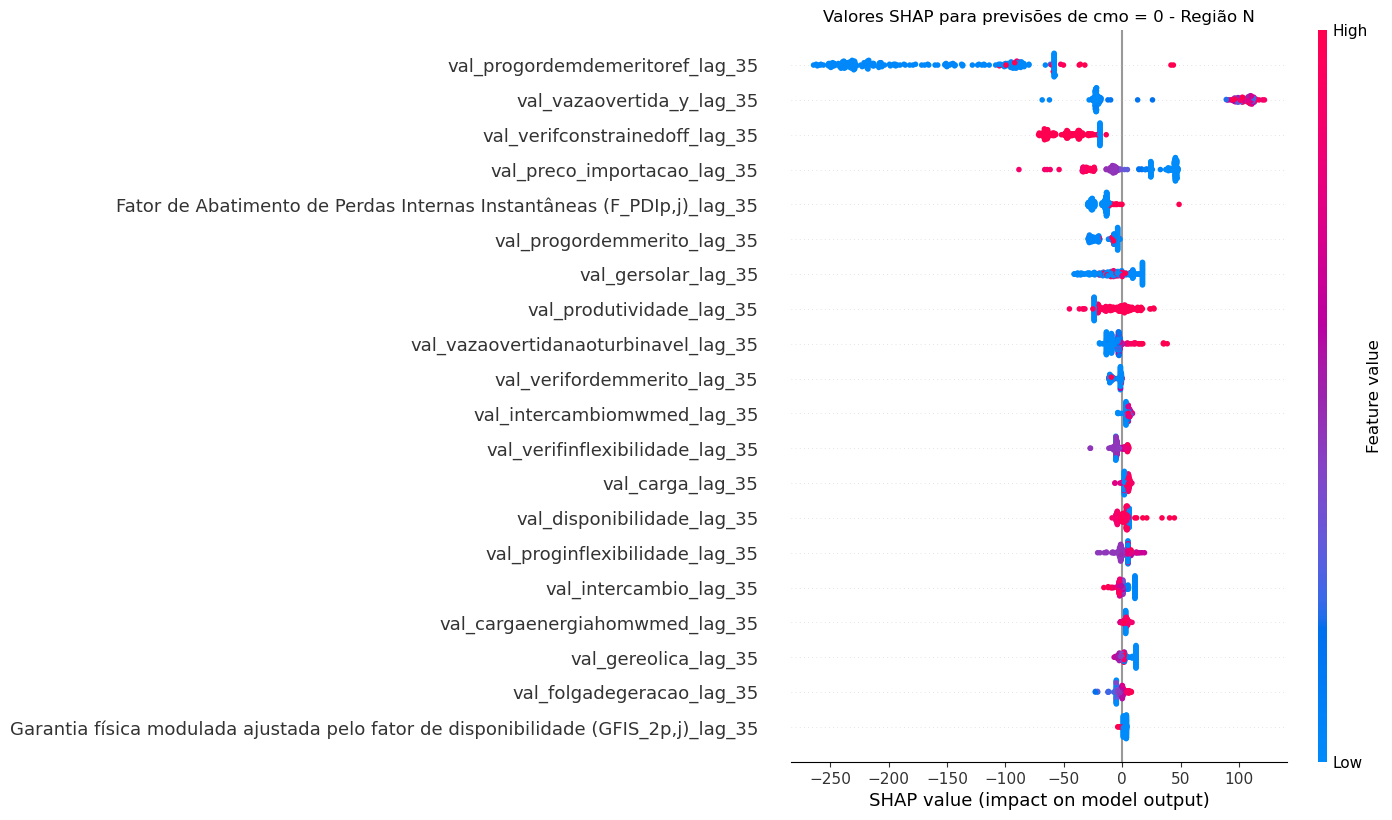

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


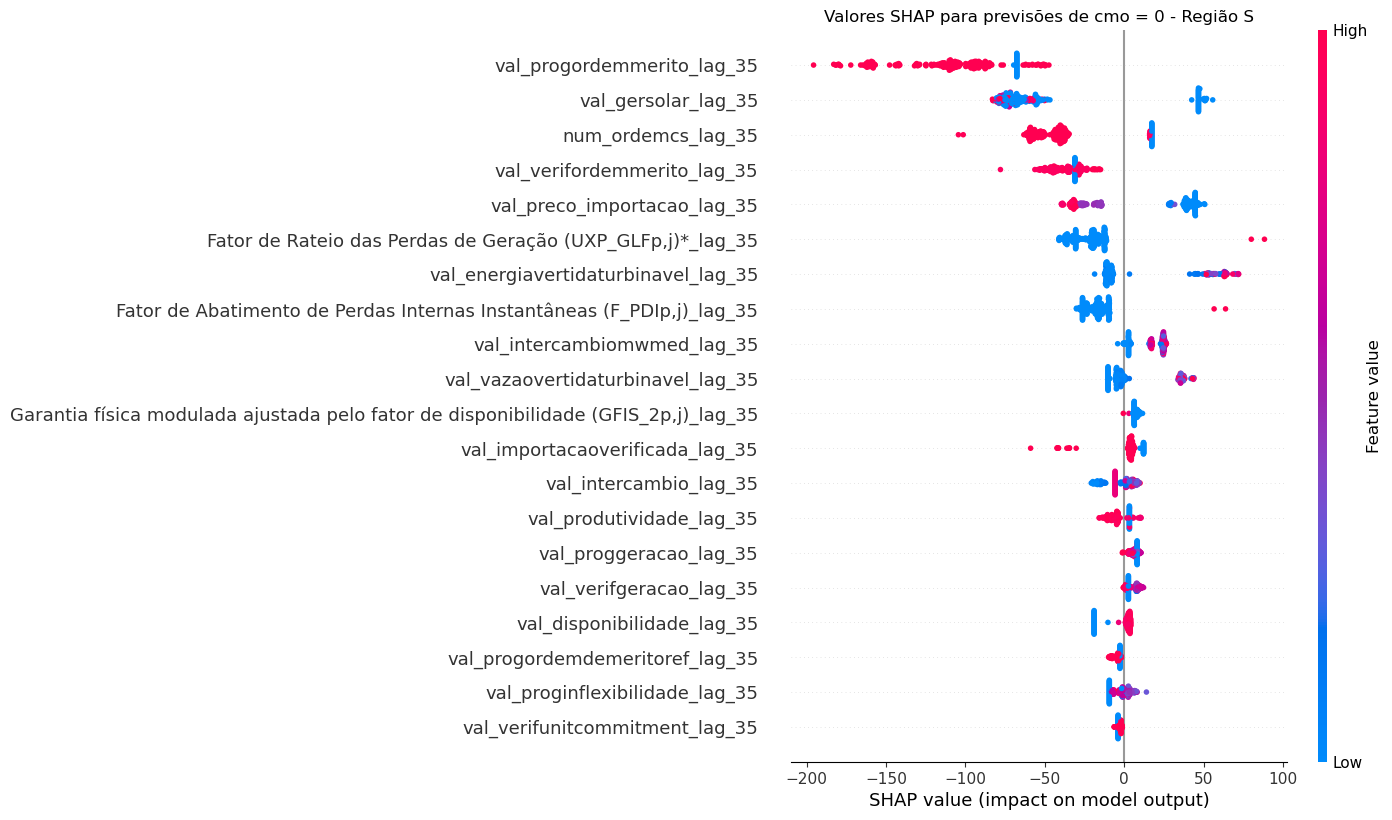

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


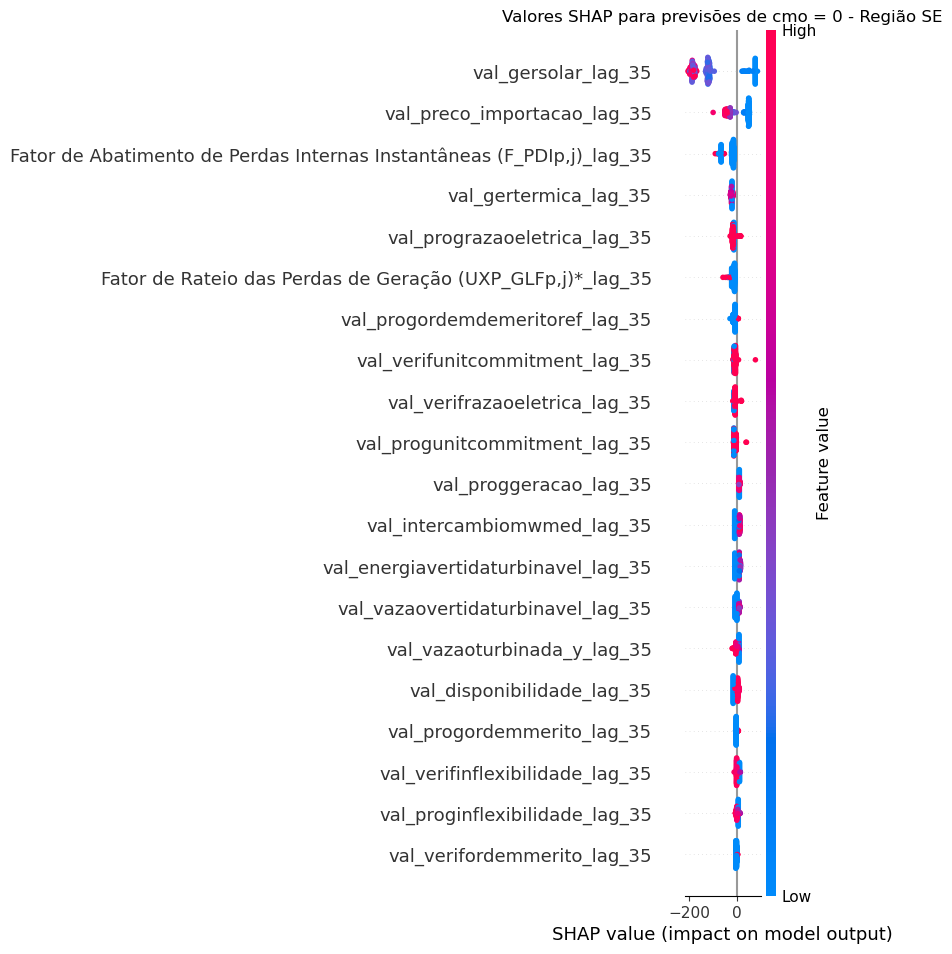

In [6]:
# Iterar sobre cada modelo e conjunto de dados
for region, (model, df) in models.items():
    # Preparar os dados onde cmo é zero
    df_zero_cmo = df[df['cmo'] == 0]
    X_zero_cmo = df_zero_cmo.drop(columns=['cmo', 'din_instante'])

    # Calcular os valores SHAP
    explainer = shap.TreeExplainer(model)
    shap_values_zero_cmo = explainer.shap_values(X_zero_cmo)

    # Visualizar os valores SHAP
    plt.figure()
    shap.summary_plot(shap_values_zero_cmo, X_zero_cmo, show=False)
    plt.title(f'Valores SHAP para previsões de cmo = 0 - Região {region}')
        
    plt.savefig(save_plot_path / f'shap_values_{region}.png')

    plt.show()